## Diabetes Prediction Using Logistics Regression

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Loading Dataset

In [3]:
dia = pd.read_csv("Diabet.csv")
dia

,EmployeeName,Patient_id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NATHANIEL FORD,PT101,Female,80.0,0,1,never,25.19,6.6,140,0
1,GARY JIMENEZ,PT102,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,ALBERT PARDINI,PT103,Male,28.0,0,0,never,27.32,5.7,158,0
3,CHRISTOPHER CHONG,PT104,Female,36.0,0,0,current,23.45,5.0,155,0
4,PATRICK GARDNER,PT105,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,William Chun,PT100096,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Antoinette L Wells,PT100097,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Richard D Swart,PT100098,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Vivian Chu,PT100099,Female,24.0,0,0,never,35.42,4.0,100,0


### EDA 

In [7]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   EmployeeName         100000 non-null  object 
 1   Patient_id           100000 non-null  object 
 2   gender               100000 non-null  object 
 3   age                  100000 non-null  float64
 4   hypertension         100000 non-null  int64  
 5   heart_disease        100000 non-null  int64  
 6   smoking_history      100000 non-null  object 
 7   bmi                  100000 non-null  float64
 8   HbA1c_level          100000 non-null  float64
 9   blood_glucose_level  100000 non-null  int64  
 10  diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 8.4+ MB


In [8]:
dia.describe(include="all")

,EmployeeName,Patient_id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,95094,100000,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Kevin Lee,PT101,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,9,1,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,NaN,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,NaN,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,NaN,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,NaN,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,NaN,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


#### Unique value for Categorical Variable

In [10]:
for col in dia.columns:
    if dia[col].dtype == 'object':
        print(col.upper(), ' : ', dia[col].nunique())
        print(dia[col].value_counts().sort_values())
        print('\n')
        

EMPLOYEENAME  :  95094
EmployeeName
Ronson W Cheong     1
NATASHA ZAHEDI      1
CHEONG TSENG ENG    1
CARLA HURLEY        1
HYDRA MENDOZA       1
                   ..
DAVID WONG          8
MICHAEL LEE         8
RICHARD LEE         8
KEVIN LEE           9
Kevin Lee           9
Name: count, Length: 95094, dtype: int64


PATIENT_ID  :  100000
Patient_id
PT101       1
PT107       1
PT108       1
PT109       1
PT110       1
           ..
PT100090    1
PT100078    1
PT100077    1
PT100080    1
PT100100    1
Name: count, Length: 100000, dtype: int64


GENDER  :  3
gender
Other        18
Male      41430
Female    58552
Name: count, dtype: int64


SMOKING_HISTORY  :  6
smoking_history
ever            4004
not current     6447
current         9286
former          9352
never          35095
No Info        35816
Name: count, dtype: int64




In [16]:
dia.drop(['EmployeeName','Patient_id'],axis=1,inplace=True)
dia

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [17]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Converting all objects to categorical codes


#### For Smoking History

In [40]:
dia['smoking_history']=np.where(dia['smoking_history'] =='ever', 'Yes', dia['smoking_history'])
dia['smoking_history']=np.where(dia['smoking_history'] =='current', 'Yes', dia['smoking_history'])
dia['smoking_history']=np.where(dia['smoking_history'] =='not current', 'Yes', dia['smoking_history'])
dia['smoking_history']=np.where(dia['smoking_history'] =='former', 'No', dia['smoking_history'])
dia['smoking_history']=np.where(dia['smoking_history'] =='never', 'No', dia['smoking_history'])
dia['smoking_history']=np.where(dia['smoking_history'] =='No Info', 'Unk', dia['smoking_history'])

In [45]:
dia.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [46]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Converting the other 'object' type variables as dummy variables-One hot encoding - categorical ->numerical



In [47]:
dia['gender'] = dia['gender'].astype('int64')
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 6.9+ MB


In [49]:
dia['smoking_history'] = dia['smoking_history'].astype('int64')
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [50]:
dia.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,0.913690,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,0.891733,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


### Checking for missing values 

<Axes: >

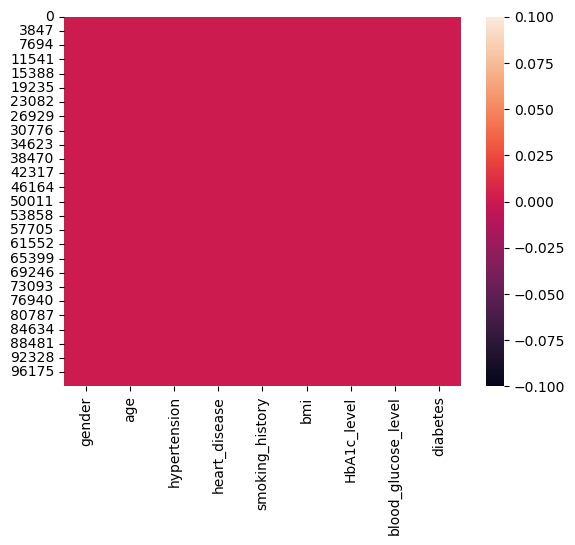

In [57]:
sns.heatmap(dia.isnull())

### Corelation Matrix 

In [58]:
correlation = dia.corr()
print(correlation)

                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.030656      0.014203       0.077696   
age                 -0.030656  1.000000      0.251171       0.233354   
hypertension         0.014203  0.251171      1.000000       0.121262   
heart_disease        0.077696  0.233354      0.121262       1.000000   
smoking_history      0.065824 -0.254645     -0.114847      -0.042747   
bmi                 -0.022994  0.337396      0.147666       0.061198   
HbA1c_level          0.019957  0.101354      0.080939       0.067589   
blood_glucose_level  0.017199  0.110672      0.084429       0.070066   
diabetes             0.037411  0.258008      0.197823       0.171727   

                     smoking_history       bmi  HbA1c_level  \
gender                      0.065824 -0.022994     0.019957   
age                        -0.254645  0.337396     0.101354   
hypertension               -0.114847  0.147666     0.080939   
heart_disease              

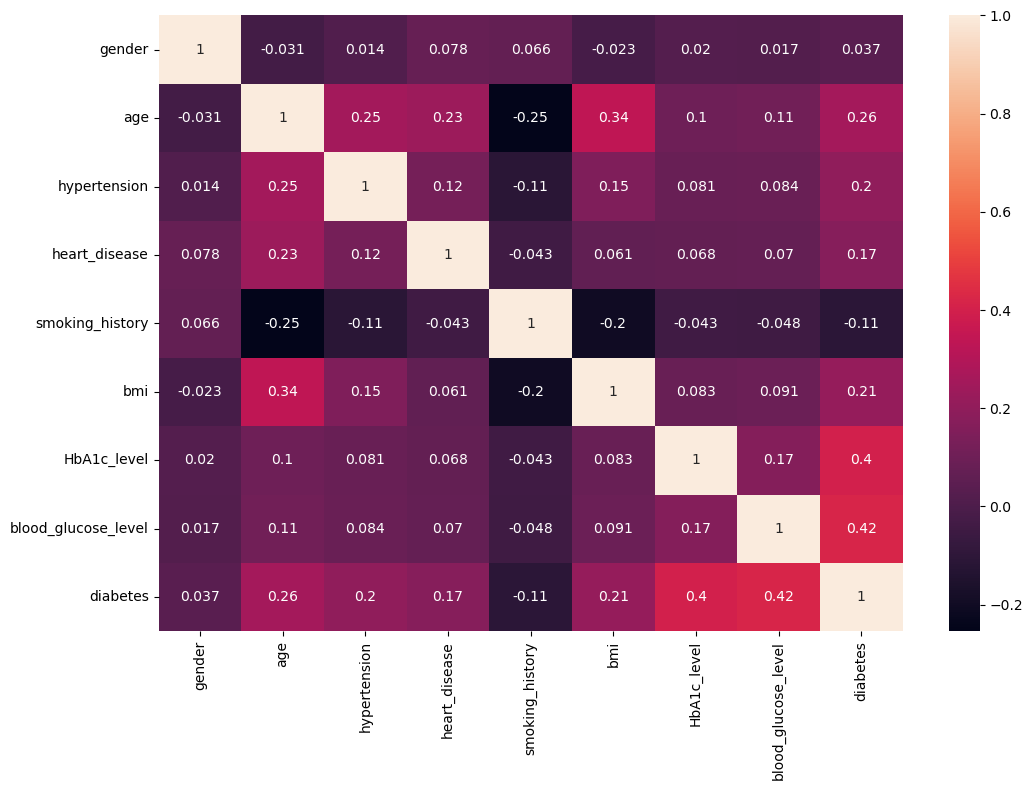

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(dia.corr(),annot=True);

## Train Test Split

In [60]:
# Copy all the predictor variables into X dataframe
x= dia.drop('diabetes',axis=1)

# Copy target into the y dataframe. 
y=dia['diabetes']

In [61]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=1, stratify=dia['diabetes'])

In [62]:
y_train.value_counts(1)

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

In [63]:
y_test.value_counts(1)

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

## Logistic Regression Model

In [64]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=2)
model.fit(x_train,y_train) #70%

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty=None, solver='newton-cg',
                   verbose=True)

### Predicting on Test and Train Dataset

In [65]:
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

### Getting predicted Classes and Probs

In [67]:
ytest_predict_prob = model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.997360,0.002640
1,0.788734,0.211266
2,0.999595,0.000405
3,0.919546,0.080454
4,0.999732,0.000268


### Model Evaluation

In [68]:
#Accuracy-traning data
model.score(x_train,y_train)

0.9604285714285714

### 
AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction

ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.